In [2]:
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import scvelo as scv
import matplotlib.pyplot as plt

In [2]:
adata = sc.read_h5ad('lung_heoa_3khvg.h5ad')

In [5]:
sc.pp.neighbors(adata, use_rep='X_umap')


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [ ]:
sc.tl.leiden(adata, resolution=10)

In [9]:
adata.obsm['X_scPoli'] = adata.obsm['X_umap']

In [10]:
import umap.umap_ as umap
model = umap.UMAP(n_neighbors=5, random_state=42, min_dist=0.5).fit(adata.obsm['X_umap'])
adata.obsm['X_umap'] = model.transform(adata.obsm['X_umap'])

In [11]:
cell_type_colors = {
    'basal cells': '#16f648',
    'club cells': '#795548',
    'ciliated cells': '#1c15bc',
    'alveolar type 1 (AT1) cells': '#85C1E9',
    'alveolar type 2 (AT2) cells': '#f1f847',
    'neuroendocrine cells': '#8F4646',
    'airway secretory cells': '#a8bade',
    'goblet cells': '#8e3101',
    'stem cells': '#225805'
}

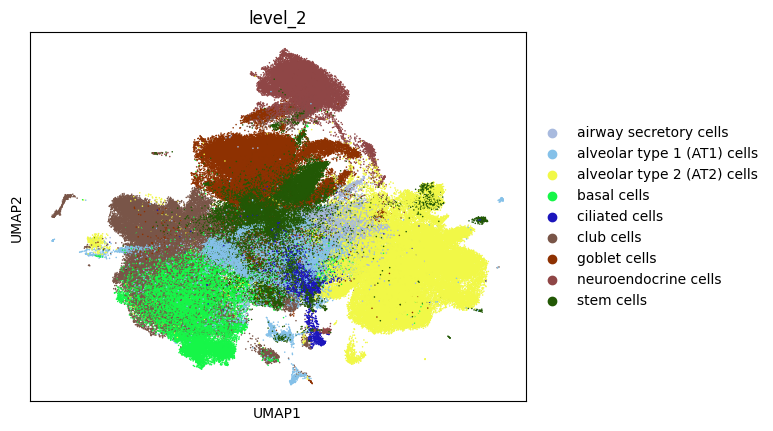

In [20]:
sc.pl.umap(adata, color='level_2', palette=cell_type_colors, size=5)

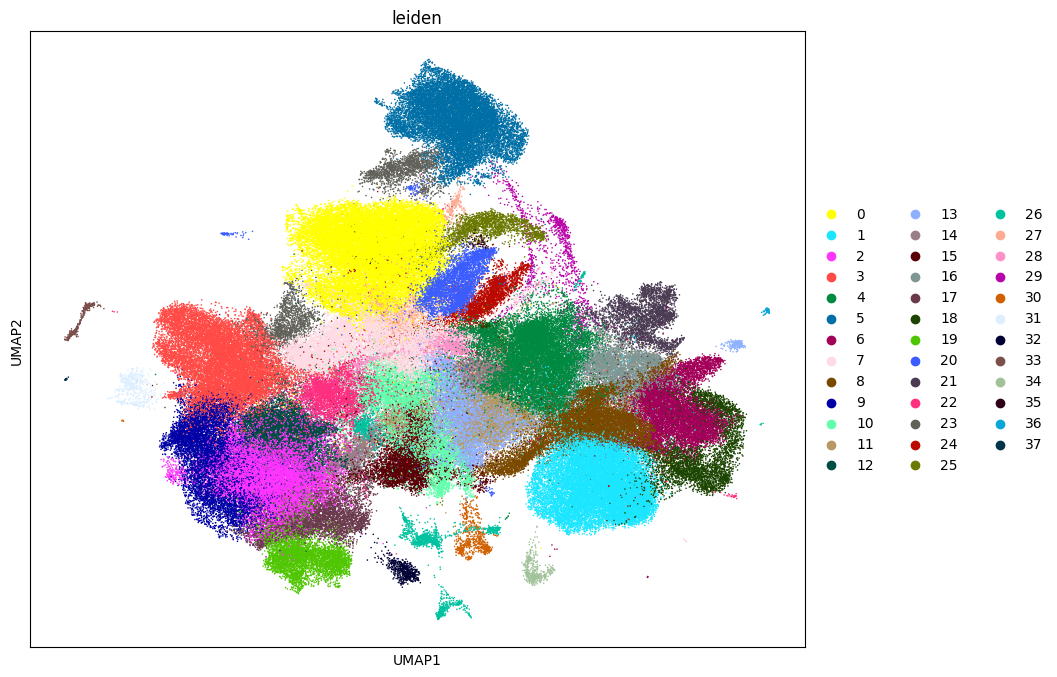

In [23]:
plt.rcParams['figure.figsize'] = (10,8)
sc.pl.umap(adata, color='leiden', size=5)

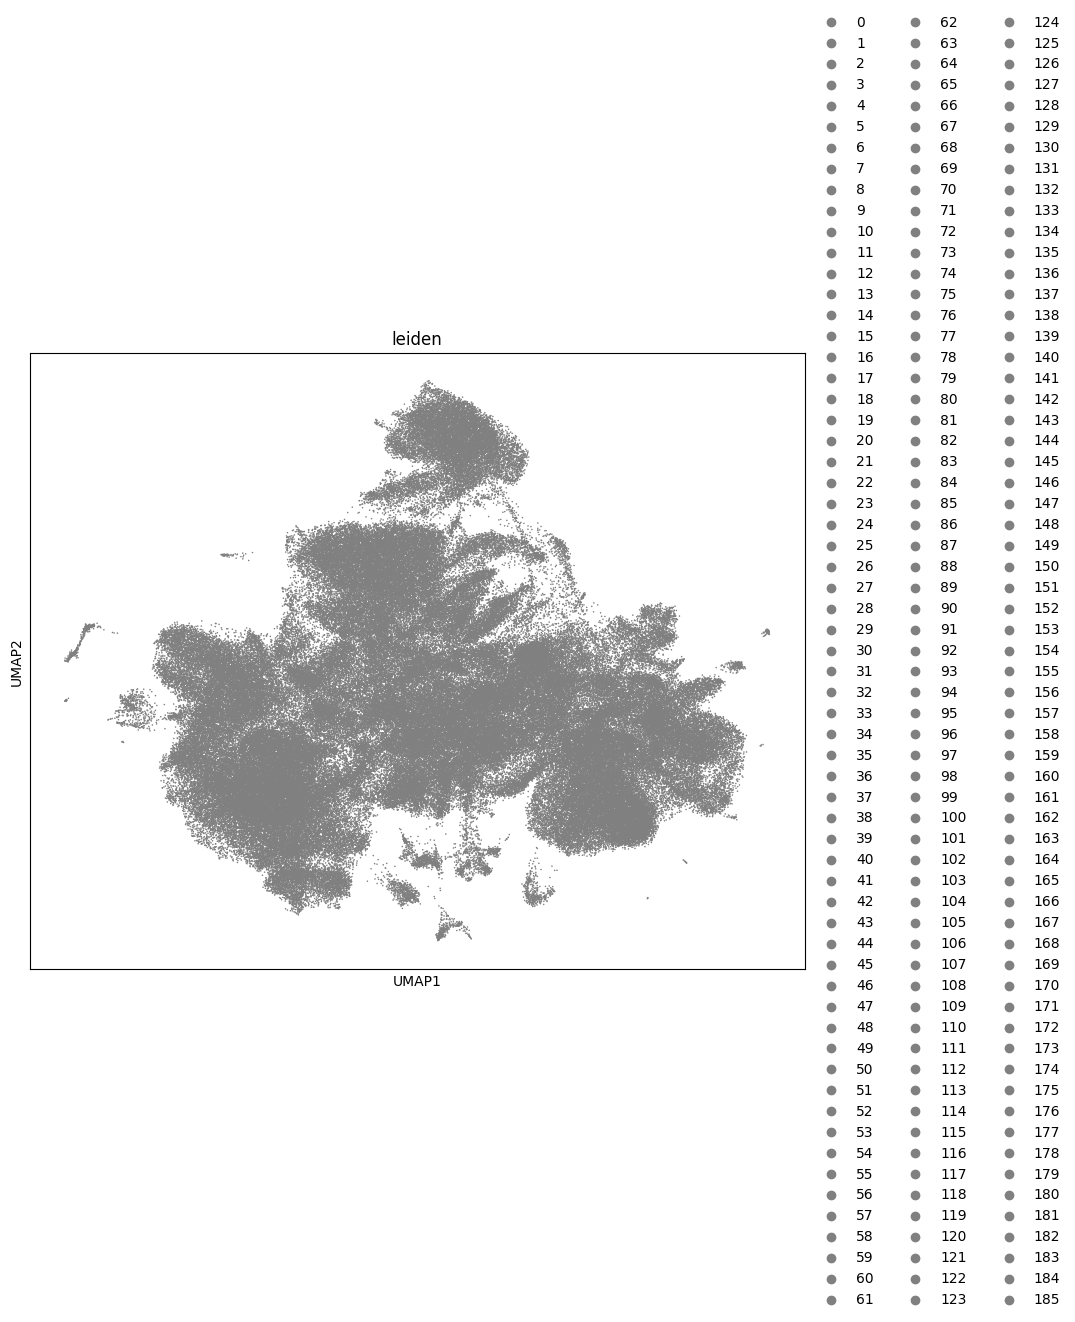

In [11]:
plt.rcParams['figure.figsize'] = (10,8)
sc.pl.umap(adata, color='leiden', size=5)

In [12]:
clusters = adata.obs.leiden.unique().tolist()

In [33]:
cluster_dataframes = []
for cluster in clusters:
    most_cells = adata.obs[adata.obs.leiden == cluster].groupby('level_2').size().idxmax()
    num_cells = adata.obs[adata.obs.leiden == cluster].groupby('level_2').size().max()
    cluster_df = pd.DataFrame({
        'Leiden_Cluster': [cluster],
        'Most_Prevalent_Cell_Type': [most_cells],
        'Number_of_Cells': [num_cells]
    })
    cluster_dataframes.append(cluster_df)

In [34]:
result_df = pd.concat(cluster_dataframes, ignore_index=True)

In [72]:
result_df.groupby('Most_Prevalent_Cell_Type')[['Leiden_Cluster', 'Number_of_Cells']].agg(list)

Leiden_Cluster  \
Most_Prevalent_Cell_Type                                                         
airway secretory cells                             [143, 64, 67, 61, 138, 162]   
alveolar type 1 (AT1) cells  [123, 126, 59, 147, 89, 62, 27, 18, 102, 122, ...   
alveolar type 2 (AT2) cells  [130, 119, 133, 112, 15, 3, 24, 55, 96, 43, 34...   
basal cells                  [106, 88, 159, 25, 14, 21, 129, 32, 47, 80, 81...   
ciliated cells                                             [120, 90, 179, 155]   
club cells                   [65, 20, 37, 135, 72, 66, 104, 48, 145, 12, 70...   
goblet cells                 [156, 50, 49, 110, 86, 33, 23, 177, 4, 180, 29...   
neuroendocrine cells         [172, 113, 5, 53, 45, 35, 78, 92, 168, 31, 171...   
stem cells                   [166, 76, 30, 85, 128, 1, 82, 60, 184, 111, 75...   

                                                               Number_of_Cells  
Most_Prevalent_Cell_Type                                                        
airway secretory cells                         [260, 1109, 672, 782, 439, 181]  
alveolar type 1 (AT1) cells  [450, 500, 1072, 287, 457, 600, 1627, 1523, 60...  
alveolar type 2 (AT2) cells  [661, 640, 561, 846, 2238, 2970, 2095, 1302, 1...  
basal cells                  [891, 1084, 332, 1709, 2216, 1351, 471, 951, 1...  
ciliated cells                                             [584, 896, 31, 195]  
club cells                   [928, 1761, 1892, 485, 1352, 1316, 463, 1678, ...  
goblet cells                 [285, 1470, 1125, 470, 862, 1899, 1991, 91, 17...  
neuroendocrine cells         [153, 594, 2805, 1640, 1717, 1552, 1265, 1168,...  
stem cells                   [187, 637, 1833, 1032, 605, 2571, 830, 1165, 9...

In [77]:
result_df.groupby('Most_Prevalent_Cell_Type')['Leiden_Cluster'].size()

Most_Prevalent_Cell_Type
airway secretory cells          6
alveolar type 1 (AT1) cells    21
alveolar type 2 (AT2) cells    42
basal cells                    27
ciliated cells                  4
club cells                     25
goblet cells                   24
neuroendocrine cells           12
stem cells                     25
Name: Leiden_Cluster, dtype: int64

In [44]:
result_df

Leiden_Cluster     Most_Prevalent_Cell_Type  Number_of_Cells
0               65                   club cells              928
1               20                   club cells             1761
2              106                  basal cells              891
3              166                   stem cells              187
4               88                  basal cells             1084
..             ...                          ...              ...
181            167                 goblet cells              151
182            153                 goblet cells              412
183            175                   stem cells               90
184            181  alveolar type 1 (AT1) cells               68
185            183  alveolar type 1 (AT1) cells               24

[186 rows x 3 columns]

In [48]:
dict_new_annot = dict(list(zip(result_df.Leiden_Cluster, result_df.Most_Prevalent_Cell_Type)))

In [49]:
adata.obs['new_annot'] = adata.obs.leiden.map(dict_new_annot).astype('category')

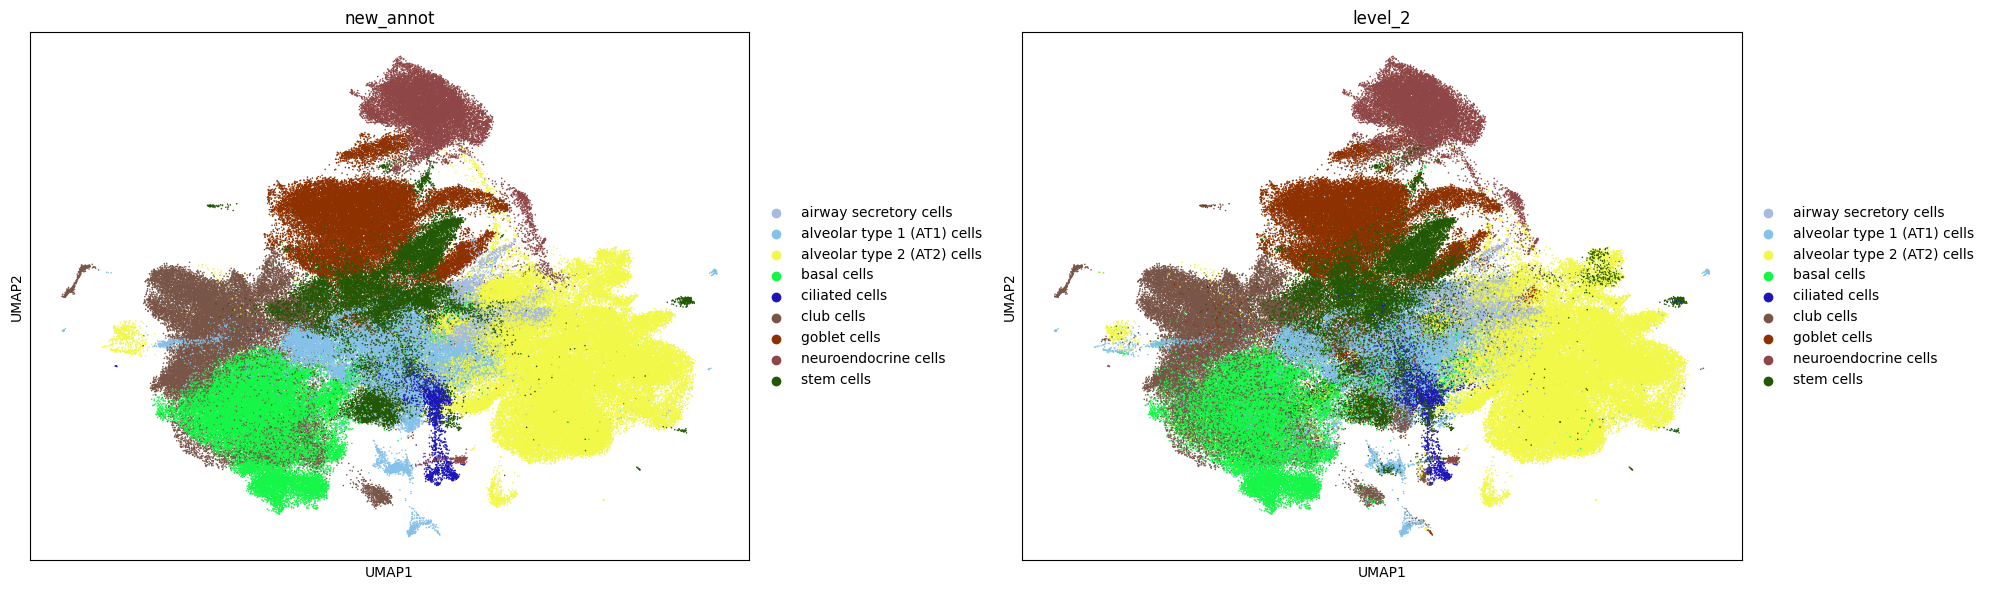

In [86]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))
sc.pl.umap(adata, color='new_annot', size=5, palette=cell_type_colors,show=False, ax=ax1)
sc.pl.umap(adata, color='level_2', size=5, palette=cell_type_colors,show=False, ax=ax2)
plt.tight_layout()
plt.show()

In [87]:
sc.tl.leiden(adata, resolution=5, key_added='leiden_res_2')

In [95]:
clusters_res_5 = adata.obs.leiden_res_5.unique().tolist()
cluster_dataframes_res_5 = []
for cluster in clusters_res_5:
    most_cells = adata.obs[adata.obs.leiden_res_5 == cluster].groupby('level_2').size().idxmax()
    num_cells = adata.obs[adata.obs.leiden_res_5 == cluster].groupby('level_2').size().max()
    cluster_df_res_5 = pd.DataFrame({
        'Leiden_Cluster': [cluster],
        'Most_Prevalent_Cell_Type': [most_cells],
        'Number_of_Cells': [num_cells]
    })
    cluster_dataframes_res_5.append(cluster_df_res_5)

In [100]:
result_df_res_5 = pd.concat(cluster_dataframes_res_5, ignore_index=True)

In [102]:
result_df_res_5.groupby('Most_Prevalent_Cell_Type')[['Leiden_Cluster', 'Number_of_Cells']].agg(list)

Leiden_Cluster  \
Most_Prevalent_Cell_Type                                                         
airway secretory cells                                        [49, 19, 45, 69]   
alveolar type 1 (AT1) cells  [79, 68, 93, 14, 74, 33, 12, 50, 76, 67, 28, 9...   
alveolar type 2 (AT2) cells  [73, 44, 5, 42, 8, 34, 85, 58, 52, 9, 77, 57, ...   
basal cells                     [72, 18, 36, 59, 13, 16, 51, 23, 1, 6, 63, 88]   
ciliated cells                                                        [82, 37]   
club cells                   [46, 53, 3, 22, 70, 38, 84, 24, 43, 60, 78, 86...   
goblet cells                        [32, 40, 35, 7, 41, 99, 26, 2, 11, 62, 83]   
neuroendocrine cells                               [66, 91, 21, 31, 4, 98, 56]   
stem cells                   [97, 48, 47, 30, 10, 55, 64, 15, 65, 87, 75, 9...   

                                                               Number_of_Cells  
Most_Prevalent_Cell_Type                                                        
airway secretory cells                                 [1447, 1824, 1059, 533]  
alveolar type 1 (AT1) cells  [460, 659, 277, 2282, 449, 1451, 2577, 1611, 5...  
alveolar type 2 (AT2) cells  [1171, 1858, 4906, 2261, 4133, 2564, 582, 1816...  
basal cells                  [1128, 3057, 1460, 1375, 2743, 3095, 1015, 155...  
ciliated cells                                                     [527, 1187]  
club cells                   [1600, 1685, 5359, 2913, 1292, 1502, 486, 2923...  
goblet cells                 [2417, 1632, 1839, 4065, 2282, 108, 1849, 5188...  
neuroendocrine cells                   [671, 171, 3389, 2366, 5171, 191, 1840]  
stem cells                   [177, 961, 1894, 2554, 2665, 988, 1176, 3779, ...

In [103]:
dict_new_annot = dict(list(zip(result_df_res_5.Leiden_Cluster, result_df_res_5.Most_Prevalent_Cell_Type)))

In [105]:
adata.obs['annot_res_5'] = adata.obs.leiden_res_5.map(dict_new_annot).astype('category')

In [110]:
adata.obs.rename(columns={'new_annot':'annot_res_10'}, inplace=True)

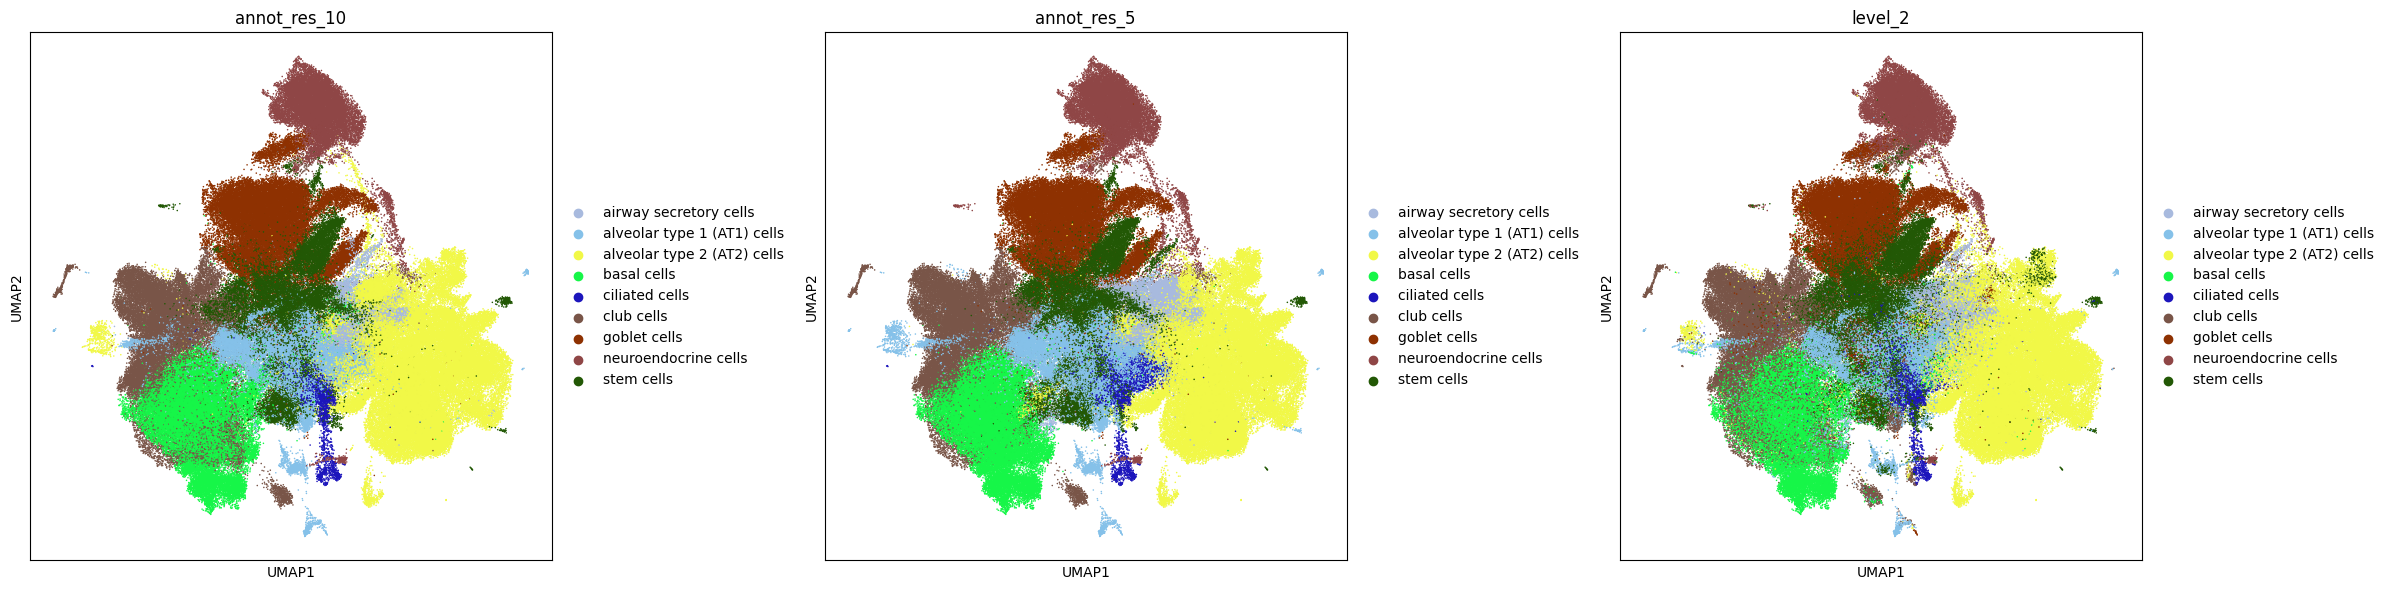

In [112]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 6))
sc.pl.umap(adata, color='annot_res_10', size=5, palette=cell_type_colors,show=False, ax=ax1)
sc.pl.umap(adata, color='annot_res_5', size=5, palette=cell_type_colors,show=False, ax=ax2)
sc.pl.umap(adata, color='level_2', size=5, palette=cell_type_colors,show=False, ax=ax3)
plt.tight_layout() 
plt.show()

In [113]:
sc.tl.leiden(adata, resolution=5, key_added='leiden_res_2')
clusters_res_2 = adata.obs.leiden_res_5.unique().tolist()
cluster_dataframes_res_2 = []
for cluster in clusters_res_2:
    most_cells = adata.obs[adata.obs.leiden_res_2 == cluster].groupby('level_2').size().idxmax()
    num_cells = adata.obs[adata.obs.leiden_res_2 == cluster].groupby('level_2').size().max()
    cluster_df_res_2 = pd.DataFrame({
        'Leiden_Cluster': [cluster],
        'Most_Prevalent_Cell_Type': [most_cells],
        'Number_of_Cells': [num_cells]
    })
    cluster_dataframes_res_2.append(cluster_df_res_2)
result_df_res_2 = pd.concat(cluster_dataframes_res_2, ignore_index=True)
dict_new_annot = dict(list(zip(result_df_res_2.Leiden_Cluster, result_df_res_2.Most_Prevalent_Cell_Type)))
adata.obs['annot_res_2'] = adata.obs.leiden_res_2.map(dict_new_annot).astype('category')

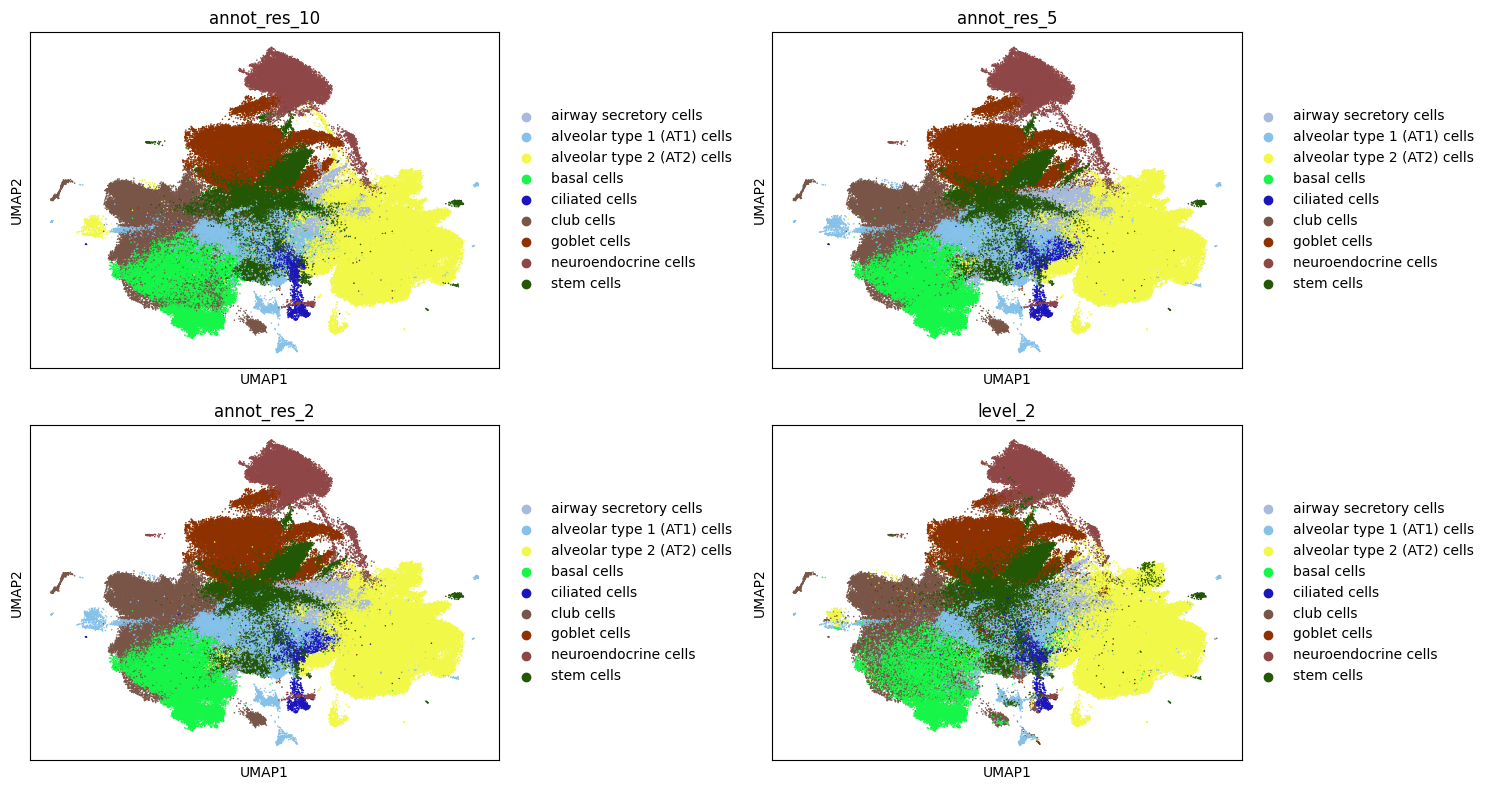

In [116]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 8))
sc.pl.umap(adata, color='annot_res_10', size=5, palette=cell_type_colors,show=False, ax=ax1)
sc.pl.umap(adata, color='annot_res_5', size=5, palette=cell_type_colors,show=False, ax=ax2)
sc.pl.umap(adata, color='annot_res_2', size=5, palette=cell_type_colors,show=False, ax=ax3)
sc.pl.umap(adata, color='level_2', size=5, palette=cell_type_colors,show=False, ax=ax4)
plt.tight_layout() 
plt.show()

In [3]:
adata = sc.read_h5ad('lung_heoa_3khvg_corr_umap.h5ad')

In [6]:
sc.pp.neighbors(adata, use_rep='X_scPoli') 

In [7]:
def leiden_annot(adata, key_added, level, result_df, name_col, res):
    sc.tl.leiden(adata, resolution=res, key_added=key_added)
    print('computing leiden clusters')
    clusters = adata.obs[key_added].unique().tolist()
    print('forming clusters list and creating dataframe')
    cluster_dataframes = []
    for cluster in clusters:
        most_cells = adata.obs[adata.obs[key_added] == cluster].groupby(level).size().idxmax()
        num_cells = adata.obs[adata.obs[key_added] == cluster].groupby(level).size().max()
        cluster_df = pd.DataFrame({
            'Leiden_Cluster': [cluster],
            'Most_Prevalent_Cell_Type': [most_cells],
            'Number_of_Cells': [num_cells]
        })
        cluster_dataframes.append(cluster_df)
    result_df = globals().get(result_df)
    result_df = pd.concat(cluster_dataframes, ignore_index=True)
    print('result df created')
    dict_new_annot = dict(list(zip(result_df.Leiden_Cluster, result_df.Most_Prevalent_Cell_Type)))
    print('adding new column to obs')
    adata.obs[name_col] = adata.obs[key_added].map(dict_new_annot).astype('category')
    print('its all done')
    

In [9]:
leiden_annot(adata=adata, key_added='leiden_res_2', level='level_2', result_df='result_df_res_2_l2', name_col='leiden_res2_l2', res=2)

computing leiden clusters
forming clusters list and creating dataframe
result df created
adding new column to obs
its all done


In [11]:
leiden_annot(adata=adata, key_added='leiden_res_5', level='level_2', result_df='result_df_res_5_l2', name_col='leiden_res5_l2', res=5)

computing leiden clusters
forming clusters list and creating dataframe
result df created
adding new column to obs
its all done


In [12]:
leiden_annot(adata=adata, key_added='leiden_res_10', level='level_2', result_df='result_df_res_10_l2', name_col='leiden_res10_l2', res=10)

computing leiden clusters
forming clusters list and creating dataframe
result df created
adding new column to obs
its all done


In [14]:
def leiden_annot_level_change(adata, key_added, level, result_df, name_col):
    print('computing leiden clusters')
    clusters = adata.obs[key_added].unique().tolist()
    print('forming clusters list and creating dataframe')
    cluster_dataframes = []
    for cluster in clusters:
        most_cells = adata.obs[adata.obs[key_added] == cluster].groupby(level).size().idxmax()
        num_cells = adata.obs[adata.obs[key_added] == cluster].groupby(level).size().max()
        cluster_df = pd.DataFrame({
            'Leiden_Cluster': [cluster],
            'Most_Prevalent_Cell_Type': [most_cells],
            'Number_of_Cells': [num_cells]
        })
        cluster_dataframes.append(cluster_df)
    result_df = globals().get(result_df)
    result_df = pd.concat(cluster_dataframes, ignore_index=True)
    print('result df created')
    dict_new_annot = dict(list(zip(result_df.Leiden_Cluster, result_df.Most_Prevalent_Cell_Type)))
    print('adding new column to obs')
    adata.obs[name_col] = adata.obs[key_added].map(dict_new_annot).astype('category')
    print('its all done')

In [15]:
leiden_annot_level_change(adata, key_added='leiden_res_2', level='level_3', result_df='result_df_res_2_l3', name_col='leiden_res2_l3')

computing leiden clusters
forming clusters list and creating dataframe
result df created
adding new column to obs
its all done


In [16]:
leiden_annot_level_change(adata, key_added='leiden_res_5', level='level_3', result_df='result_df_res_5_l3', name_col='leiden_res5_l3')

computing leiden clusters
forming clusters list and creating dataframe
result df created
adding new column to obs
its all done


In [17]:
leiden_annot_level_change(adata, key_added='leiden_res_10', level='level_3', result_df='result_df_res_10_l3', name_col='leiden_res10_l3')

computing leiden clusters
forming clusters list and creating dataframe
result df created
adding new column to obs
its all done


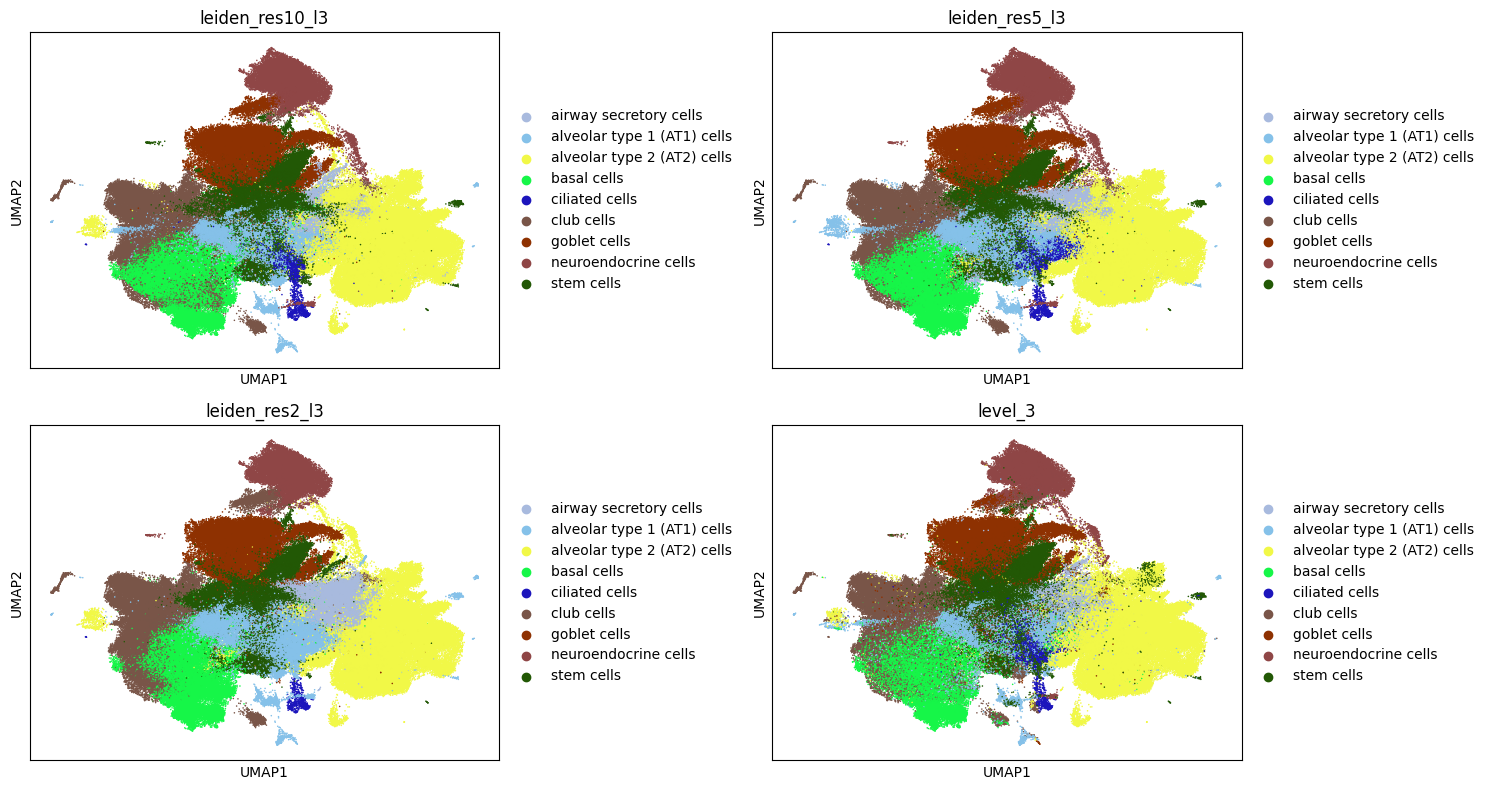

In [25]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 8))
sc.pl.umap(adata, color='leiden_res10_l3', size=5, palette=cell_type_colors,show=False, ax=ax1)
sc.pl.umap(adata, color='leiden_res5_l3', size=5, palette=cell_type_colors,show=False, ax=ax2)
sc.pl.umap(adata, color='leiden_res2_l3', size=5, palette=cell_type_colors,show=False, ax=ax3)
sc.pl.umap(adata, color='level_3', size=5, palette=cell_type_colors,show=False, ax=ax4)
plt.tight_layout() 
plt.show()

In [26]:
adata.write('adata_leiden.h5ad')

In [5]:
adata = sc.read_h5ad('adata_leiden.h5ad')

In [7]:
df_asc = pd.crosstab(adata[adata.obs.derive == 'ASC'].obs['sample_id'], adata[adata.obs.derive == 'ASC'].obs['leiden_res5_l3'])
df_fsc = pd.crosstab(adata[adata.obs.derive == 'FSC'].obs['sample_id'], adata[adata.obs.derive == 'FSC'].obs['leiden_res5_l3'])
df_ips = pd.crosstab(adata[adata.obs.derive == 'IPS'].obs['sample_id'], adata[adata.obs.derive == 'IPS'].obs['leiden_res5_l3'])

In [8]:
df_asc_norm = df_asc.div(df_asc.sum(axis=1), axis=0)
df_fsc_norm = df_fsc.div(df_fsc.sum(axis=1), axis=0)
df_ips_norm = df_ips.div(df_ips.sum(axis=1), axis=0)

In [9]:
df_asc_norm_sort = df_asc_norm.sort_values(by=['stem cells'], ascending=False)
df_fsc_norm_sort = df_fsc_norm.sort_values(by=['stem cells'], ascending=False)
df_ips_norm_sort = df_ips_norm.sort_values(by=['stem cells'], ascending=False)

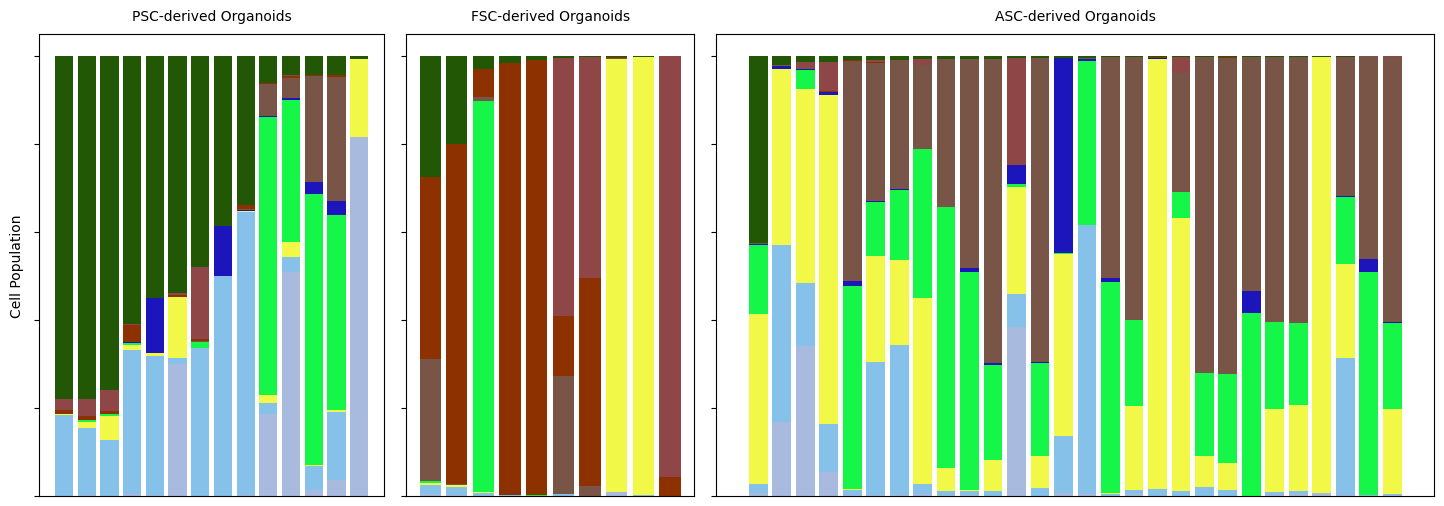

In [14]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharex=False, sharey=True, gridspec_kw={'width_ratios': [1.2, 1, 2.5], 'wspace' : 0.05})

dfs = [df_ips_norm_sort,df_fsc_norm_sort, df_asc_norm_sort]

labels = ['PSC-derived Organoids','FSC-derived Organoids', 'ASC-derived Organoids', ]

for i, (df, label) in enumerate(zip(dfs, labels)):
    sample_ids = df.index

    cell_types = df.columns

    bottom = [0] * len(sample_ids)
    for cell_type in cell_types:
        counts = df[cell_type]
        axs[i].bar(sample_ids, counts, bottom=bottom, color=cell_type_colors[cell_type])
        bottom = [b + c for b, c in zip(bottom, counts)]

    axs[i].set_xticks([])
    axs[i].set_xticklabels([])
     
    axs[i].set_xlabel(label, labelpad=10)
    axs[i].xaxis.set_label_position('top')
    if i == 0:
        axs[i].set_ylabel('Cell Population')
    else:
        axs[i].set_yticklabels([]) 

plt.savefig('Stacked_Bar_Derived_Organoid.png')
plt.show()


In [52]:
sc.pl.umap(adata, color='leiden_res5_l3', size=5, palette=cell_type_colors,show=False, save='_leiden_res5_level_3.png')

<Axes: title={'center': 'leiden_res5_l3'}, xlabel='UMAP1', ylabel='UMAP2'>

In [53]:
sc.pl.umap(adata, color='leiden_res5_l2', size=5, palette=cell_type_colors,show=False, save='_leiden_res5_level_2.png')

<Axes: title={'center': 'leiden_res5_l2'}, xlabel='UMAP1', ylabel='UMAP2'>